In [1]:
%load_ext autoreload
%autoreload 2

import torch

from deeplearning.homework_01 import WeatherForecast

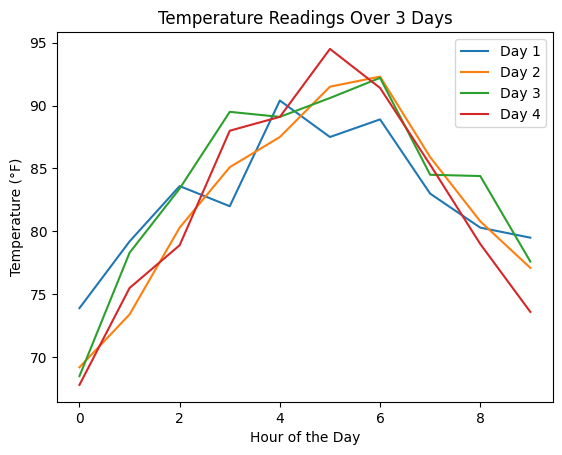

In [112]:
import torch
import math
import matplotlib.pyplot as plt

torch.manual_seed(42)
torch.set_printoptions(precision=1)

def generate_temperature_readings(days, hours):
    base_temps = torch.tensor([70 + 20 * math.sin(math.pi * (hour / hours)) for hour in range(hours)])
    temps = base_temps.repeat(days, 1) + torch.randn(days, hours) * 2
    return torch.round(temps * 10) / 10

days = 4
hours = 10
temps_tensor = generate_temperature_readings(days, hours)

# Convert the tensor to a list
temps_list = temps_tensor.tolist()

# Plot the data
for day, temps in enumerate(temps_list, start=1):
    plt.plot(range(hours), temps, label=f'Day {day}')

plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Readings Over 3 Days')
plt.legend()
plt.show()

In [31]:
wf = WeatherForecast(temps_tensor)
wf.data

tensor([[63.9, 69.2, 73.6, 72.0, 80.4, 77.5, 78.9, 73.0, 70.3, 69.5],
        [59.2, 63.4, 70.3, 75.1, 77.5, 81.5, 82.3, 75.9, 70.8, 67.1],
        [58.5, 68.3, 73.4, 79.5, 79.1, 80.6, 82.2, 74.5, 74.4, 67.6],
        [57.8, 65.5, 68.9, 78.0, 79.1, 84.5, 81.4, 75.3, 69.0, 63.6]])

In [118]:
wf.data.diff(dim=1)

tensor([[ 5.3,  4.4, -1.6,  8.4, -2.9,  1.4, -5.9, -2.7, -0.8],
        [ 4.2,  6.9,  4.8,  2.4,  4.0,  0.8, -6.4, -5.1, -3.7],
        [ 9.8,  5.1,  6.1, -0.4,  1.5,  1.6, -7.7, -0.1, -6.8],
        [ 7.7,  3.4,  9.1,  1.1,  5.4, -3.1, -6.1, -6.3, -5.4]])

In [120]:
wf.find_min_and_max_per_day()

(tensor([63.9, 59.2, 58.5, 57.8]), tensor([80.4, 82.3, 82.2, 84.5]))

In [124]:
wf.find_the_largest_drop()

tensor(-1.5)

In [123]:
wf.find_the_most_extreme_day()

tensor([63.9, 59.2, 58.5, 57.8])

In [137]:
wf.max_last_k_days(k=2)

tensor([82.2, 84.5])

In [138]:
wf.predict_temperature(k=2)

tensor(73.1)

In [147]:
wf.data

tensor([[63.9, 69.2, 73.6, 72.0, 80.4, 77.5, 78.9, 73.0, 70.3, 69.5],
        [59.2, 63.4, 70.3, 75.1, 77.5, 81.5, 82.3, 75.9, 70.8, 67.1],
        [58.5, 68.3, 73.4, 79.5, 79.1, 80.6, 82.2, 74.5, 74.4, 67.6],
        [57.8, 65.5, 68.9, 78.0, 79.1, 84.5, 81.4, 75.3, 69.0, 63.6]])

In [149]:
# take data from day 3 (10 measurements) and randomize slightly
torch.manual_seed(42)

t = wf.data[2] + torch.randn_like(wf.data[2]) * 0.5
t

tensor([58.7, 68.4, 73.5, 79.6, 78.5, 80.5, 83.3, 74.2, 74.6, 67.7])

In [155]:
(wf.data - t.unsqueeze(0)).abs().mean(dim=1).argmin()

tensor(2)